In [1]:
# ALL LIBRERS :
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC

#print(os.listdir("../"))
dim = 100

In [20]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.neighbors._classification")

I've implemented two function in order to choose the fruit wanted, for binary classification I've decided to take Cocos and Pineapple cause they look similar and so the classification task will be not too easy.

In [2]:
def getYourFruits(fruits, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['Training', 'Test']
    if not k_fold:
        path = "fruits-360/" + data_type + "/"
        for i,f in enumerate(fruits):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type.upper(), " images of " , fruits[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "fruits-360/" + v + "/"
            for i,f in enumerate(fruits):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    
def getAllFruits():
    fruits = []
    for fruit_path in glob.glob("fruits-360/Training/*"):
        fruit = fruit_path.split("/")[-1]
        fruits.append(fruit)
    return fruits

I've implemented two function in order to choose the fruit wanted, for binary classification I've decided to take Cocos and Pineapple cause they look similar and so the classification task will be not too easy.

In [3]:
#Choose your Fruits
fruits = ['Pineapple' , 'Cocos'] #Binary classification

#Get Images and Labels
X_t, y_train =  getYourFruits(fruits, 'Training', print_n=True, k_fold=False)
X_test, y_test = getYourFruits(fruits, 'Test', print_n=True, k_fold=False)

#Get data for k-fold
X,y = getYourFruits(fruits, '', print_n=True, k_fold=True)
print(X_test.shape)
#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_t])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X = scaler.fit_transform([i.flatten() for i in X])

There are  490   TRAINING  images of  PINEAPPLE
There are  490   TRAINING  images of  COCOS
There are  166   TEST  images of  PINEAPPLE
There are  166   TEST  images of  COCOS
(332, 100, 100, 3)


Each image is converted in a 100x100 numpy array for each RGB dimension (x3). Then has been flatted in one single vector (Image Features Vector) and then scaled subtracting the mean of the dataset in order to perform classification algorithms.

# VISUALIZATION OF DATA

Let's see now how one of our samples appears

In [4]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(15, 15)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1

Pineapple


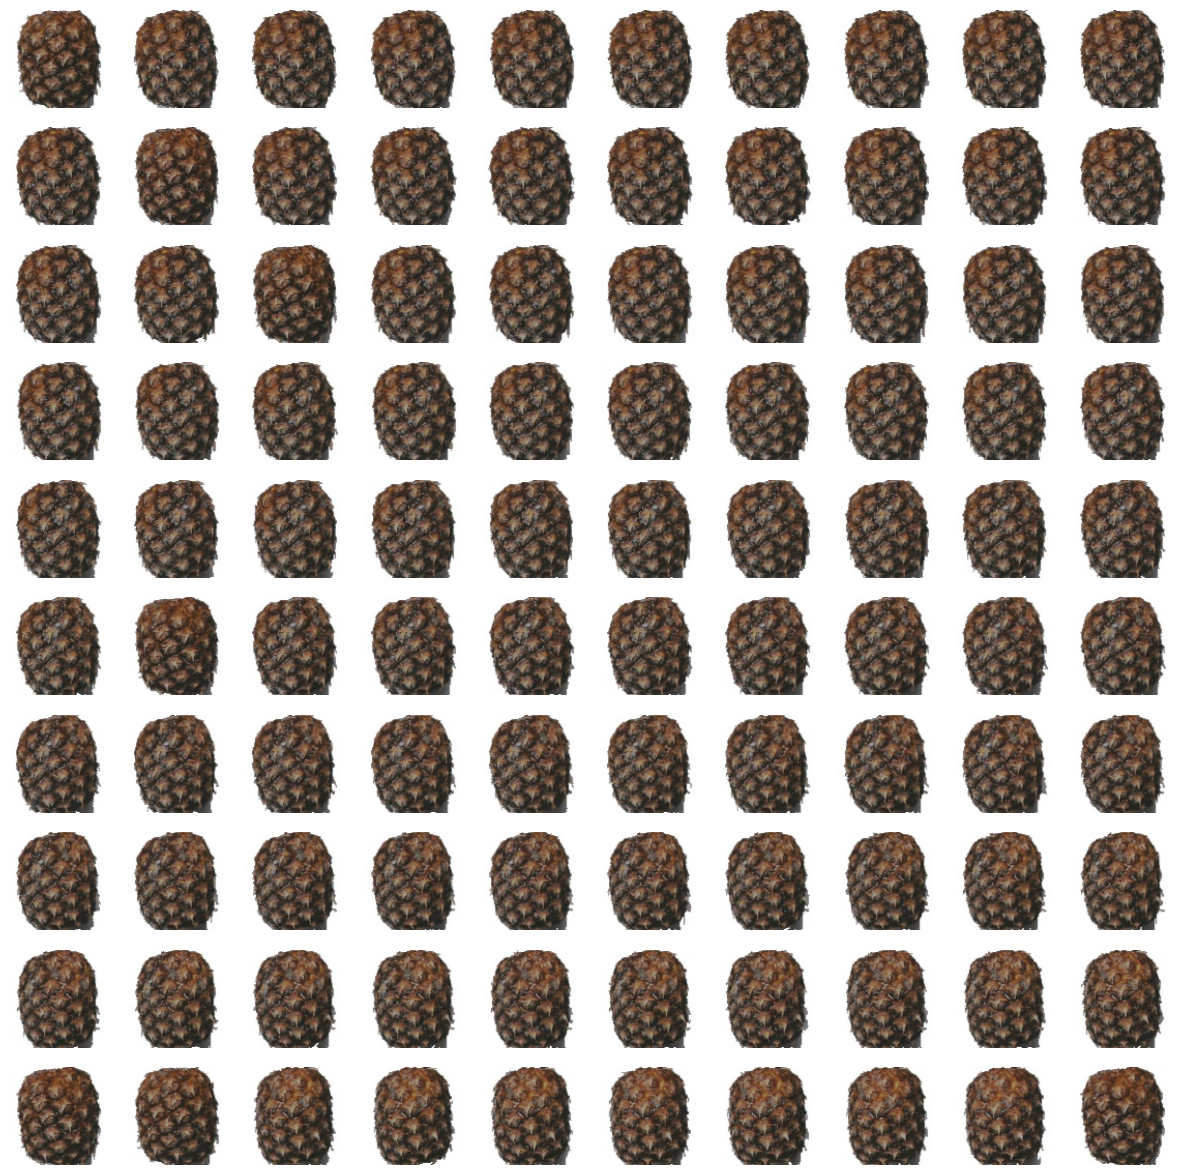

In [5]:
print(fruits[y_train[0]])
plot_image_grid(X_t[0:100], 10, 10)

Cocos


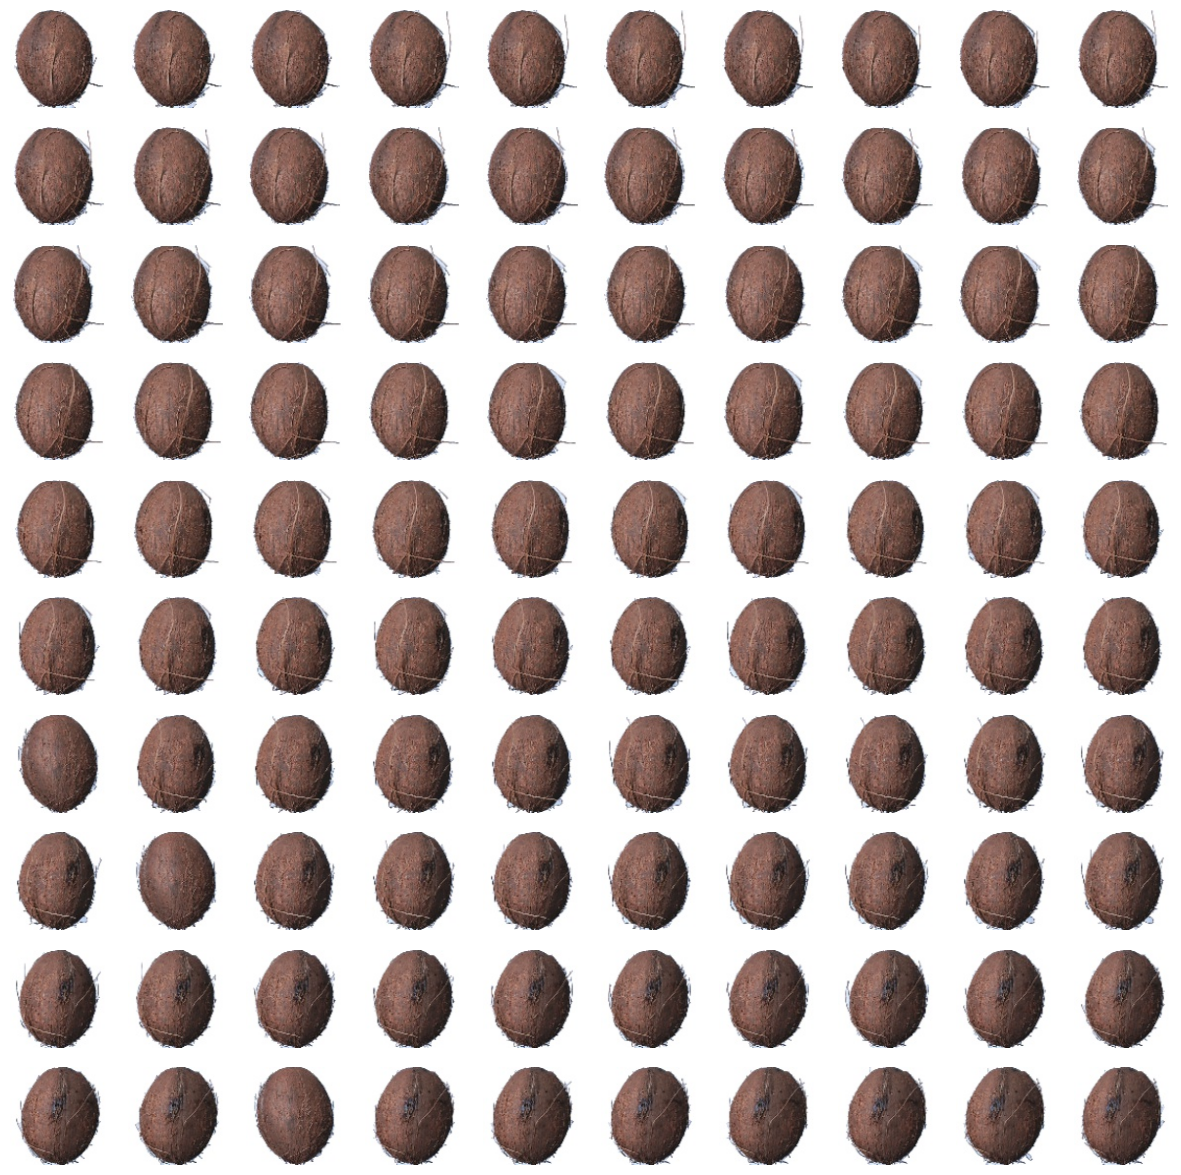

In [6]:
print(fruits[y_train[490]])
plot_image_grid(X_t[490:590], 10, 10)

### DATA IN LOWER DIMENSIONS

In order to discover how our data appears in lower dimension we need to reduce dimensionality of the dataset in 2 or 3 dimension so that we can plot and visualize them. To do this I've decided to use Principal Component Analysis, explained in the next chapter, but a better solution could be use t-SNE (T-distributed Stochastic Neighbor Embedding) or MDS (Multi Dimensional Scaling), nonlinear dimensionality reduction techniques well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions.
No assumption about linearity of the dataset could be make considering those graphs.

### PRINCIPAL COMPONENT ANALYSIS

Principal Component Analysis is a technique used in order to reduce the dimensionality of a dataset while preserving as mush information as possible. Data is reprojected in a lower dimensional space, in particular we need to find a projection that minimizes the squared error in reconstructing the original data.

In [18]:
def getClassNumber(y):
    v =[]
    i=0
    count = 0
    for index in y:
        if(index == i):
            count +=1
        else:
            v.append(count)
            count = 1
            i +=1
    v.append(count)
    return v

def plotPrincipalComponents(X, dim):
    v = getClassNumber(y_train)
    colors = 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple'
    markers = ['o', 'x' , 'v', 'd']
    tot = len(X)
    start = 0
    if(dim == 2):
        for i,index in enumerate(v):
            end = start + index
            plt.scatter(X[start:end,0],X[start:end,1] , color=colors[i%len(colors)], marker=markers[i%len(markers)], label = fruits[i])
            start = end
        plt.xlabel('PC1')
        plt.ylabel('PC2')

    if(dim == 3):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for i,index in enumerate(v):
            end = start + index
            ax.scatter(X[start:end,0], X[start:end,1], X[start:end,2], color=colors[i%len(colors)], marker=markers[i%len(markers)], label = fruits[i])
            start = end
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')


    plt.legend(loc='lower left')
    plt.xticks()
    plt.yticks()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=fruits, yticklabels=fruits,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

### DATA IN 2D

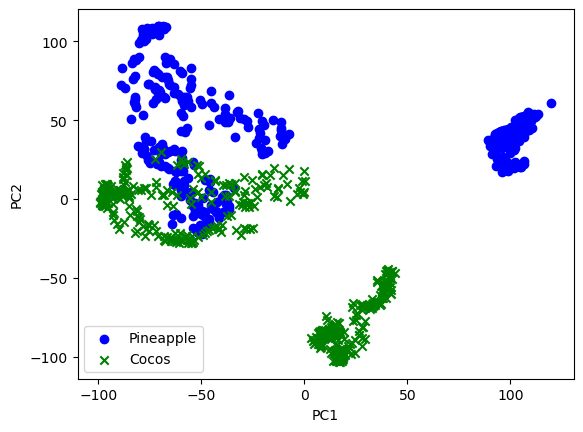

In [8]:
pca = PCA(n_components=2)
dataIn2D = pca.fit_transform(X_train)
plotPrincipalComponents(dataIn2D, 2)

### DATA IN 3D

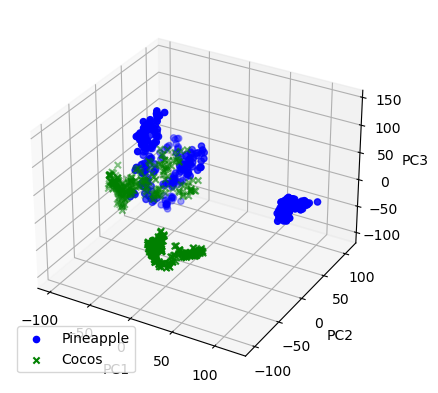

In [9]:
pca = PCA(n_components=3)
dataIn3D = pca.fit_transform(X_train)
plotPrincipalComponents(dataIn3D, 3)

### BINARY CLASSIFICATION

Let's start now to classify our dataset, firstly we take only two class in order to perform a classic binary classification, at the end the entire dataset (or a sub-part of it) will be classified. I'll use 3 different technique: SVM, K-NN, Decision Tree.
At the end of the Binary Classification there will be a comparison between all the methods.

### K-FOLD CROSS VALIDATION

K-fold cross validation is a technique used in machine learning to evaluate the performance of a model by dividing the data into k subsets, or "folds", and training the model on k-1 of the folds and testing it on the remaining one. This process is repeated k times, with each fold being used as the test set once, and the average performance of the model is used as the final evaluation.

In the context of fruit classification, k-fold cross validation could be used to evaluate the performance of a machine learning model that has been trained to classify different types of fruits. The dataset would be divided into k subsets, and the model would be trained and tested on each subset, with the average performance being used to evaluate the model's overall accuracy.

# SUPPORT VECTOR MACHINES (SVM)

Accuracy with SVM: 97.590%


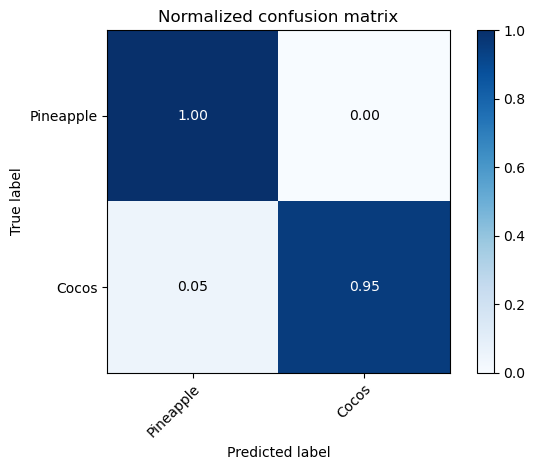

In [10]:
svm = SVC(gamma='auto', kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.3f}%".format(precision))
cm , _ = plot_confusion_matrix(y_test, y_pred,classes=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()

# calculate the FPR and TPR for all thresholds of the classification
probs = svm.predict_proba(X_test)
probs = probs[:, 1]
svm_fpr, svm_tpr, thresholds = metrics.roc_curve(y_test, probs)
svm_auc = metrics.roc_auc_score(y_test, probs)

### SVM + K-FOLD

In [14]:
pred_kfold = cross_val_score(svm, X, y, cv=5)
print("Accuracy with SVM and K-FOLD CROSS VALIDATION: %0.3f (+/- %0.3f)" % (pred_kfold.mean(),pred_kfold.std() * 2))

Accuracy with SVM and K-FOLD CROSS VALIDATION: 0.968 (+/- 0.067)


# K-NEAREST NEIGHBOR

Accuracy with K-NN: 98.795%


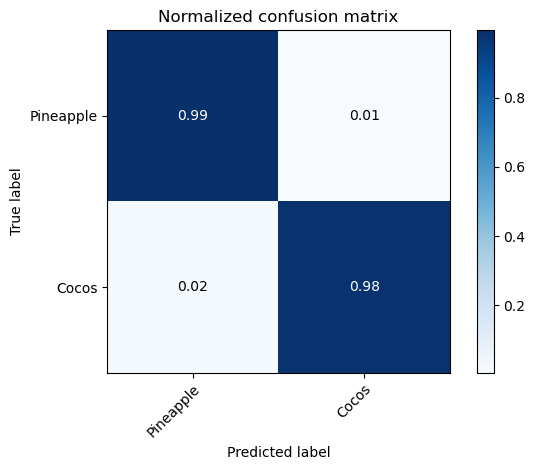

In [21]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with K-NN: {0:.3f}%".format(precision))
cm , _ = plot_confusion_matrix(y_test, y_pred, classes=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()

# calculate the FPR and TPR for all thresholds of the classification
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
knn_fpr, knn_tpr, thresholds = metrics.roc_curve(y_test, probs)
knn_auc = metrics.roc_auc_score(y_test, probs)

### KNN + K-FOLD

In [22]:
#KNN + K-FOLD
pred_kfold = cross_val_score(knn, X, y, cv=5)
print("Accuracy with K-NN and K-FOLD CROSS VALIDATION: %0.3f (+/- %0.3f)" % (pred_kfold.mean(), pred_kfold.std() * 2))

Accuracy with K-NN and K-FOLD CROSS VALIDATION: 0.964 (+/- 0.074)


# DECISION TREE


Accuracy with Decision Tree: 65.663%


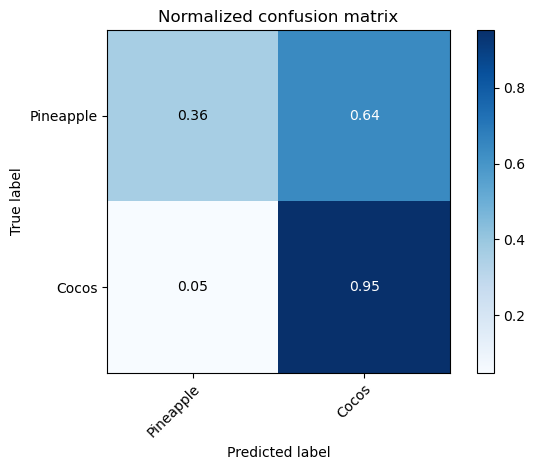

In [23]:
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Decision Tree: {0:.3f}%".format(precision))
cm , _ = plot_confusion_matrix(y_test, y_pred, classes=y_train, normalize=True, title='Normalized confusion matrix')
plt.show()

# calculate the FPR and TPR for all thresholds of the classification
probs = tree.predict_proba(X_test)
probs = probs[:, 1]
tree_fpr, tree_tpr, thresholds = metrics.roc_curve(y_test, probs)
tree_auc = metrics.roc_auc_score(y_test, probs)

### DECISION TREE + K-FOLD

In [24]:
#DECISION TREE + K-FOLD
pred_kfold = cross_val_score(tree, X, y, cv=5)
print("Accuracy with DECISION TREE and K-FOLD CROSS VALIDATION: %0.3f (+/- %0.3f)" % (pred_kfold.mean(), pred_kfold.std() * 2))

Accuracy with DECISION TREE and K-FOLD CROSS VALIDATION: 0.944 (+/- 0.097)


# MODEL EVALUATION

In order to find the most suitable algorithm to this dataset, different evaluation methods will be presented: Accuracy, Confusion Matrix, ROC Curve.
Given:

TP = #samples for which the prediction is Fruit1 and the true label is Fruit1
FP = #samples for which the prediction is Fruit2 but the true label is Fruit1
TN = #samples for which the prediction is Fruit2 and the true label is Fruit2
FN = #samples for which the prediction is Fruit1 but the true label is Fruit2
We can define:

*ACCURACY:  𝑇𝑃+𝑇𝑁𝑇𝑃+𝐹𝑃+𝑇𝑁+𝐹𝑁  that is the percentage of samples classified correctly. *

CONFUSION MATRIX: A simple table with previous values used to show performance of a classifier

ROC CURVE: Area Under the Receiver Operating Characteristic curve (AUC)

To introduce this concept, we define the following two metrics:

True positive rate (TPR): TPR = recall =  𝑇𝑃𝐹𝑁+𝑇𝑃


False positive rate (FPR): FPR =  𝐹𝑃𝑇𝑁+𝐹𝑃

In order to plot the Receiver Operating Characteristic (ROC) curve we need to compute TPR and FPR and choose a number of thresholds for the classification (AUG). Area under the ROC curve, performed plotting TPR and FPR is used as evaluation matrics for the different classifiers.

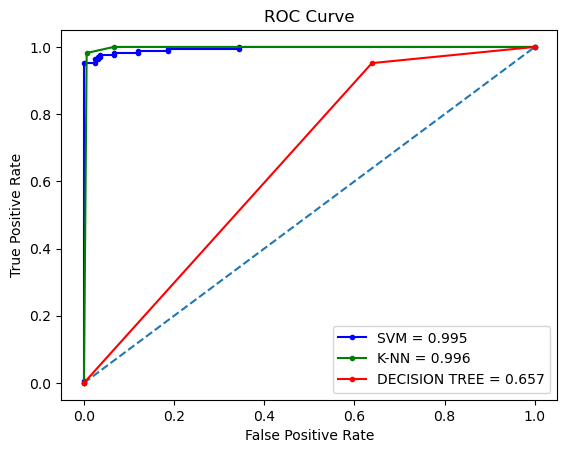

In [25]:
#ROC CURVE
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(svm_fpr, svm_tpr, 'b', marker='.', label = 'SVM = %0.3f' % svm_auc )
plt.plot(knn_fpr, knn_tpr, 'g', marker='.', label = 'K-NN = %0.3f' % knn_auc)
plt.plot(tree_fpr, tree_tpr, 'r', marker='.',label = 'DECISION TREE = %.3f' % tree_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

COMMENT:
SVM and K-NN performs better with this classification with an AUC = 0.99x, instead Decision Tree is worst with an AUC of 0.65

# MULTI-CLASS CLASSIFICATION

In [26]:
fruits = ['Orange', 'Banana' , 'Strawberry', 'Apple Golden 1', 'Kiwi' , 'Lemon', 'Cocos' , 'Pineapple' , 'Peach', 'Cherry 1', 'Cherry 2', 'Mandarine']
#fruits = getAllFruits() #Be sure to have enough free memory

#Get Images and Labels
X, y =  getYourFruits(fruits, 'Training')
X_test, y_test = getYourFruits(fruits, 'Test')

#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X])
X_test = scaler.fit_transform([i.flatten() for i in X_test])

In [27]:
#SVM
model = SVC(gamma='auto', kernel='linear')
model.fit(X_train, y)
y_pred = model.predict(X_test)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(precision))

#K-NN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y)
y_pred = model.predict(X_test)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with K-NN: {0:.2f}%".format(precision))

#DECISION TREE
model = DecisionTreeClassifier()
model.fit(X_train,y)
y_pred = model.predict(X_test)
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Decision Tree: {0:.2f}%".format(precision))

Accuracy with SVM: 98.04%
Accuracy with K-NN: 91.74%
Accuracy with Decision Tree: 70.53%


COMMENT
SVM is the classification algorithm that performs better in the multi-class classification task.